Практична робота №8

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Завдання 

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 1041s 21s/step - loss: 1.0536 - accuracy: 0.6733 - val_loss: 0.5038 - val_accuracy: 0.7560
Epoch 2/10
47/47 [==============================] - 957s 20s/step - loss: 0.4801 - accuracy: 0.7700 - val_loss: 0.4184 - val_accuracy: 0.8140
Epoch 3/10
47/47 [==============================] - 975s 21s/step - loss: 0.4624 - accuracy: 0.7833 - val_loss: 0.5303 - val_accuracy: 0.7500
Epoch 4/10
47/47 [==============================] - 959s 20s/step - loss: 0.4266 - accuracy: 0.8127 - val_loss: 0.4031 - val_accuracy: 0.8100
Epoch 5/10
47/47 [==============================] - 940s 20s/step - loss: 0.3861 - accuracy: 0.8380 - val_loss: 0.3403 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 921s 19s/step - loss: 0.3773 - accuracy: 0.8293 - val_loss: 0.3207 - val_accuracy: 0.8780
Epoch 7/10
47/47 [==============================] - 870s 18s/ste

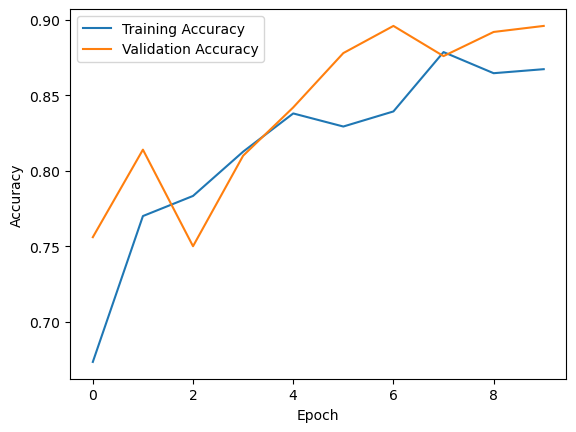

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

main_folder = '10_food_classes_all_data'
train_dir = os.path.join(main_folder, 'train')
test_dir = os.path.join(main_folder, 'test')
# os.path.join використовується для інтелектуального з’єднання одного або кількох компонентів шляху. Він приймає будь-яку 
#кількість компонентів шляху як аргументи та об’єднує їх із відповідним роздільником для операційної системи.

classes = ['chicken_wings', 'sushi']

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# ImageDataGenerator - wt інструмент для збільшення та попередньої обробки даних під час роботи з даними зображень у 
#глибокому навчанні.
# rescale призначений для зміни масштабу значень пікселів зображень. Це крок нормалізації, коли кожне значення пікселя 
#ділиться на 255, гарантуючи, що значення пікселя знаходяться в діапазоні [0, 1].
# shear_range - це трансформація, яка змінює форму зображення. Цей параметр визначає інтенсивність зсуву. 
#Він приймає значення від 0 до 1, що представляє частку зображення, яку потрібно зсунути.
# zoom_range - керує діапазоном випадкового масштабування, застосованого до зображень. 
#Значення 0,2 означає, що зображення можна збільшувати на 20%.
# horizontal_flip - дозволяє довільне горизонтальне гортання зображень. Це звичайна техніка збільшення даних для 
#збільшення розміру навчального набору даних і покращення здатності моделі до узагальнення.

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  
    classes=classes
)
# target_size - визначає розмір, до якого буде змінено розмір усіх зображень під час процесу завантаження.
# batch_size - визначає кількість зразків, які будуть використовуватися в кожній ітерації (або партії) 
#під час навчання або оцінювання.

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=classes
)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Conv2D - згортковий шар із 32 фільтрами (також відомими як ядра або канали), кожен з яких має розмір (3, 3).
# MaxPooling2D - шар максимального об’єднання, який зменшує просторові розміри представлення. 
#Він приймає максимальне значення з набору значень у регіоні.
# Flatten - використовується для зведення вхідних даних. Він перетворює дані 2D-масиву в 1D-масив. 
#Його часто використовують перед передачею зведених даних на щільний (повністю зв’язаний) шар.
# Згорткові шари є основними будівельними блоками CNN для вилучення ознак. 
#Вони застосовують операції згортки до вхідних даних.
# MaxPooling шари об’єднання використовуються для просторової дискретизації, 
#зменшуючи просторові розміри вхідного представлення.
# Flatten шар використовується для перетворення даних із двовимірного масиву 
#(наприклад, виведення згорткових шарів) на одновимірний масив.
# Щільні шари – це повністю зв’язані шари, які виконують класифікацію на основі ознак, виділених згортковими шарами.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10 , validation_data=test_generator)

evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()